<a href="https://colab.research.google.com/github/npace828/HappinessScoreArgentina/blob/main/Pace_Sprint7_Modeul3_Proj_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install category_encoders==2.*

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
# visualization
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# encoders
from category_encoders import OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

#pipeline
from sklearn.pipeline import make_pipeline

# Bagged Model
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from google.colab import files
uploaded=files.upload()

In [ ]:
df = pd.read_csv(fm_path).set_index('country')

In [ ]:
# >>> s = '"abcd" efgh'
# >>> s.replace('"', '')
# 'abcd efgh'
for i in df['region']:
  df['region'] =  i.replace("'", '')

In [ ]:
cols_to_drop = ['region', 'country.1']
df = df.drop(columns = cols_to_drop)

In [ ]:
df.head()

,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,happyScore,GDP
country,,,,,,,,
Armenia,37.0,4.9,2.42,2096.76,1731.506667,31.445556,4.350,0.76821
Angola,26.0,4.3,3.19,1448.88,1044.240000,42.720000,4.033,0.75778
Argentina,60.0,7.1,1.91,7101.12,5109.400000,45.475556,6.574,1.05351
Austria,59.0,7.2,2.11,19457.04,16879.620000,30.296250,7.200,1.33723
Australia,65.0,7.6,1.80,19917.00,15846.060000,35.285000,7.284,1.33358


In [ ]:
target='happyScore'
X = df.drop(columns=target)

y = df[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=42)
X_train, X_val, y_train,  y_val = train_test_split(X_train, y_train, test_size = .2, random_state=42)

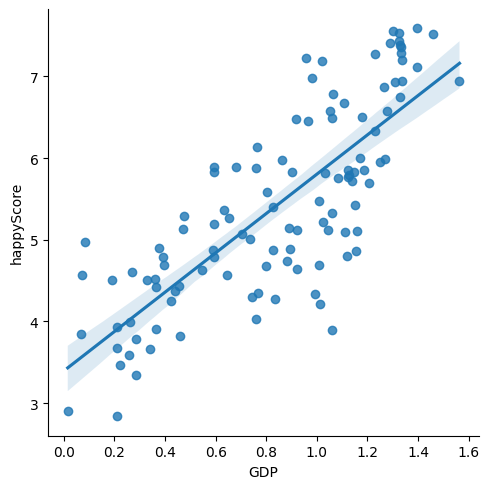

In [ ]:
sns.lmplot(x='GDP', y = 'happyScore', data=df)
plt.show()

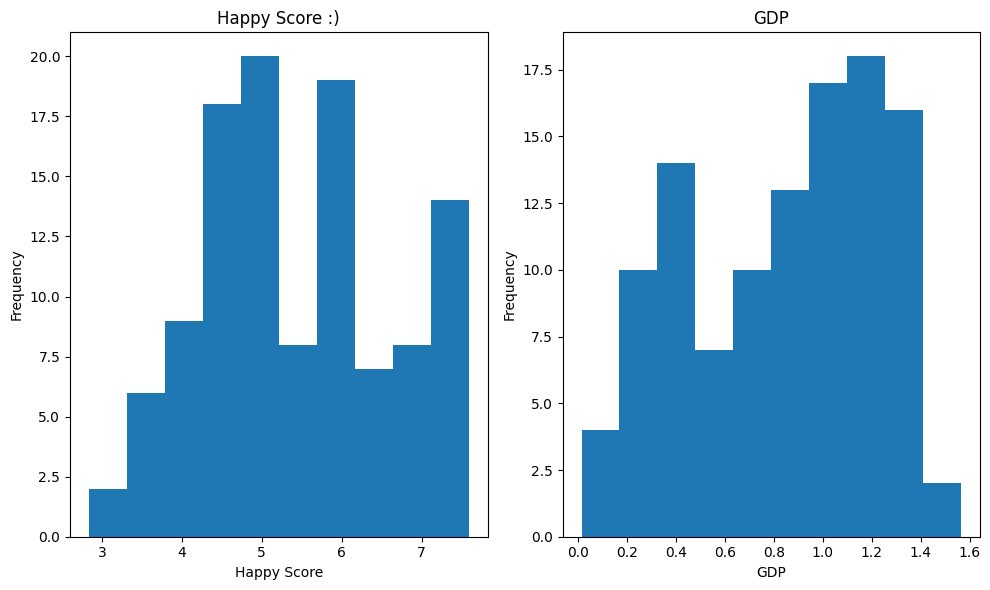

In [ ]:
plt.figure(figsize=(10, 6))

# Histogram for the target variable
plt.subplot(1, 2, 1)
plt.hist(df['happyScore'], bins=10)
plt.xlabel('Happy Score')
plt.ylabel('Frequency')
plt.title('Happy Score :)')

# Histogram for the independent column
plt.subplot(1, 2, 2)
plt.hist(df['GDP'], bins=10)
plt.xlabel('GDP')
plt.ylabel('Frequency')
plt.title('GDP')

plt.tight_layout()
plt.show()

In [ ]:
from xgboost import XGBRegressor

model_xgb = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy='mean'),
    XGBRegressor(random_state=42, n_estimators=75, n_jobs=-1))
model_xgb.fit(X_train, y_train)


Pipeline(steps=[('ordinalencoder', OrdinalEncoder(cols=[], mapping=[])),
                ('simpleimputer', SimpleImputer()),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=75,
                              n_jobs=-1, num_parallel_tree=None, predictor=None,
                              random_state=42, ...))])

In [ ]:
model_xgb.score(X_train, y_train)

0.9999993965904831

In [ ]:
xgb_pred = model_xgb.predict(X_test)

In [ ]:
xgb_pred

array([4.9069123, 3.5551376, 7.067006 , 5.4542217, 4.85798  , 4.160315 ,
       5.85598  , 5.8815126, 4.8132005, 3.825222 , 6.4917517, 5.519504 ,
       4.180561 , 5.8070974, 6.3007264, 6.8306656, 5.369149 , 3.7141564,
       4.45052  , 5.028775 , 5.593568 , 6.6218395, 3.7623227, 5.3714004,
       7.037095 , 6.0516996, 5.405004 , 7.3924217, 4.9992814, 6.9548264,
       3.8010492, 7.0115356, 4.4877434, 7.5247383], dtype=float32)

In [ ]:
mae=mean_absolute_error(y_test, xgb_pred)
print("mean abs error: ", mae)

mean abs error:  0.47027894311792706


In [ ]:
from sklearn.inspection import permutation_importance


<Axes: >

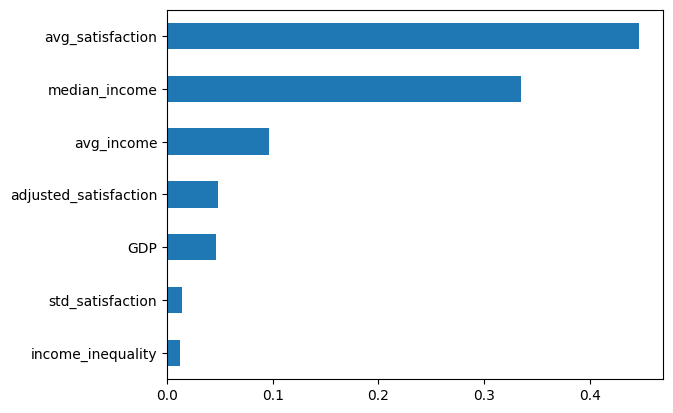

In [ ]:
importances = model_xgb.named_steps['xgbregressor'].feature_importances_
feature_names = X_train.columns
feat_imp = pd.Series(data=importances, index=feature_names).sort_values()
feat_imp.tail(10).plot(kind='barh')


In [ ]:
result = permutation_importance(model_xgb, X_test, y_test, n_repeats=10, random_state=42)

In [ ]:
importances = result.importances_mean
importance_std = result.importances_std


for i, importance in enumerate(importances):
    print(f"Feature '{X.columns[i]}': {importance:.4f} +/- {importance_std[i]:.4f}")

Feature 'adjusted_satisfaction': 0.1992 +/- 0.0524
Feature 'avg_satisfaction': 0.3354 +/- 0.0728
Feature 'std_satisfaction': -0.0005 +/- 0.0101
Feature 'avg_income': 0.0590 +/- 0.0406
Feature 'median_income': 0.0700 +/- 0.0128
Feature 'income_inequality': -0.0223 +/- 0.0102
Feature 'GDP': 0.0602 +/- 0.0209


In [ ]:
model_to_permute = model_xgb = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    XGBRegressor(random_state=42, n_estimators=75, n_jobs=-1))
model_to_permute.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder', OrdinalEncoder(cols=[], mapping=[])),
                ('simpleimputer', SimpleImputer()),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=75,
                              n_jobs=-1, num_parallel_tree=None, predictor=None,
                              random_state=42, ...))])

In [ ]:
print("validation accuracy: ", model_to_permute.score(X_val, y_val))


validation accuracy:  0.7701914510702146


In [ ]:
X_val_perm = X_val.copy()

In [ ]:
X_val_perm['avg_income']= np.random.permutation(X_val_perm['avg_income'])

In [ ]:
print("val accuracy: ", model_to_permute.score(X_val_perm, y_val))

val accuracy:  0.5462207528924745


In [ ]:
perm_imp = permutation_importance(model_to_permute, X_val, y_val, random_state=42)

In [ ]:
data_perm = {'imp_mean':perm_imp['importances_mean'],
             'imp_std':perm_imp['importances_std']}
df_perm = pd.DataFrame(data_perm, index=X_val.columns).sort_values('imp_mean')

In [ ]:
df_perm.head()

,imp_mean,imp_std
std_satisfaction,-0.029497,0.008412
GDP,0.001314,0.017941
income_inequality,0.002809,0.015671
median_income,0.063432,0.032007
adjusted_satisfaction,0.079183,0.024572


<Axes: >

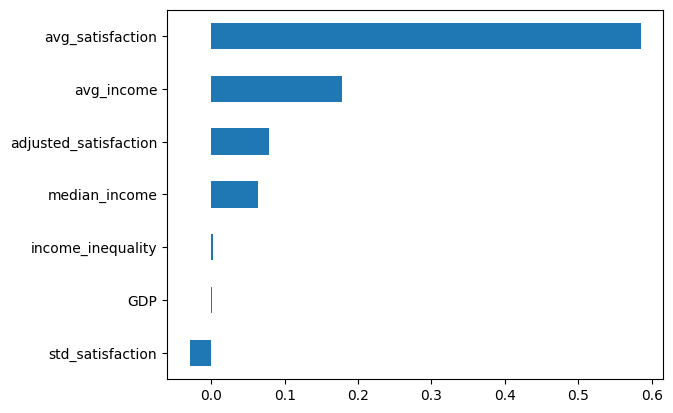

In [ ]:
df_perm['imp_mean'].tail(10).plot(kind='barh')

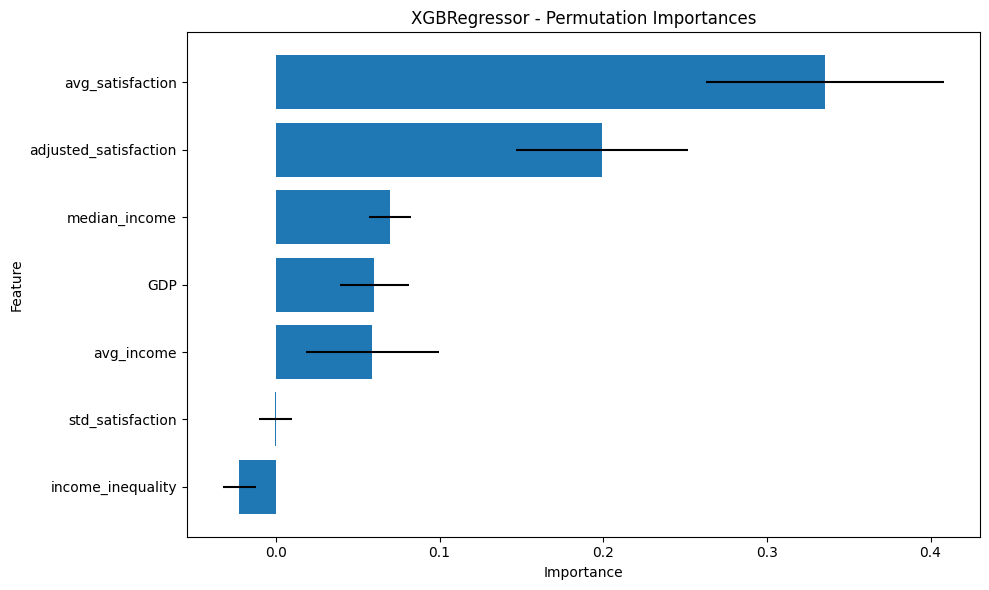

In [ ]:
result = permutation_importance(model_xgb, X_test, y_test.drop(columns=['happyScore']), n_repeats=10, random_state=42)

importances = result.importances_mean
importance_std = result.importances_std
feature_names = X.columns


indices = np.argsort(importances)
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], xerr=importance_std[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('XGBRegressor - Permutation Importances')
plt.tight_layout()
plt.show()